In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv("SMSSpamCollection", sep ='\t',names =['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
df.columns

Index(['text'], dtype='object')

In [68]:
df.info

<bound method DataFrame.info of                                                 text
0  Ok lar i double check wif da hair dresser alre...
1  As a valued customer, I am pleased to advise y...
2  Today is "song dedicated day.." Which song wil...>

In [69]:
df.describe

<bound method NDFrame.describe of                                                 text
0  Ok lar i double check wif da hair dresser alre...
1  As a valued customer, I am pleased to advise y...
2  Today is "song dedicated day.." Which song wil...>

In [70]:
df.shape

(3, 1)

In [71]:
df.isnull().sum()

text    0
dtype: int64

In [3]:
# seprate input and output

x = df['text']
y = df['label']

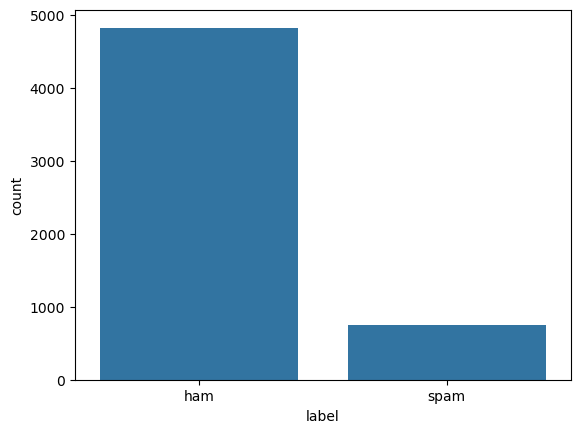

In [4]:
sns.countplot(x = y);

In [5]:
# data processing

"""
1. tokenize
2. remove punct
3. remove stopwords
4. remove suffixes to get root words
5. convert the data in numerical format

""";

In [6]:
sent = "Hello friends ! How are you? I like Python Programming."

In [7]:
sent

'Hello friends ! How are you? I like Python Programming.'

### tokenize

In [8]:
from nltk.tokenize import word_tokenize

In [10]:
tokens1 = word_tokenize(sent)

In [11]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [12]:
filtered_tokens = []

for i in tokens1:
    if i.isalpha():
        filtered_tokens.append(i.lower())

In [13]:
filtered_tokens

['hello', 'friends', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

### remove stopwords

In [14]:
from nltk.corpus import stopwords

In [15]:
swords = stopwords.words('english')

In [16]:
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
tokens3 = [x for x in filtered_tokens if x not in swords]

In [18]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

### # stemming

In [19]:
from nltk.stem import PorterStemmer

In [20]:
ps = PorterStemmer()

In [21]:
ps.stem('worked')

'work'

In [22]:
tokens4 = [ps.stem(x) for x in tokens3 ]

In [23]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [24]:
# Create a function to clean the data

In [25]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)    # tokenize
    filtered_tokens = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in filtered_tokens if x not in swords] 
    tokens4 = [ps.stem(x) for x in tokens3 ]
    return tokens4

In [26]:
sent = 'It was not possible for him. Time was running out'

In [27]:
clean_text(sent)

['possibl', 'time', 'run']

In [28]:
# apply on input data

In [29]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [30]:
x.apply(lambda x: clean_text(x))

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### tf idf

In [32]:
sent = ["IBM was founded in 1911 as the Computing-Tabulating-Recording Company (CTR), a holding company of manufacturers of record-keeping and measuring systems."
        "It was renamed International Business Machines in 1924 and soon became the leading manufacturer of punch-card tabulating systems." 
        "During the 1960s and 1970s, the IBM mainframe, exemplified by the System/360 and its successors, was the world's dominant computing platform, with the company producing 80 percent of computers in the U.S. and 70 percent of computers worldwide."]

In [33]:
sent

["IBM was founded in 1911 as the Computing-Tabulating-Recording Company (CTR), a holding company of manufacturers of record-keeping and measuring systems.It was renamed International Business Machines in 1924 and soon became the leading manufacturer of punch-card tabulating systems.During the 1960s and 1970s, the IBM mainframe, exemplified by the System/360 and its successors, was the world's dominant computing platform, with the company producing 80 percent of computers in the U.S. and 70 percent of computers worldwide."]

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer()

In [36]:
sent_new = tfidf.fit_transform(sent)

In [37]:
sent_new.toarray();

In [38]:
tfidf.get_feature_names_out()

array(['1911', '1924', '1960s', '1970s', '360', '70', '80', 'and', 'as',
       'became', 'business', 'by', 'card', 'company', 'computers',
       'computing', 'ctr', 'dominant', 'during', 'exemplified', 'founded',
       'holding', 'ibm', 'in', 'international', 'it', 'its', 'keeping',
       'leading', 'machines', 'mainframe', 'manufacturer',
       'manufacturers', 'measuring', 'of', 'percent', 'platform',
       'producing', 'punch', 'record', 'recording', 'renamed', 'soon',
       'successors', 'system', 'systems', 'tabulating', 'the', 'was',
       'with', 'world', 'worldwide'], dtype=object)

In [39]:
# create a dataframe

In [40]:
sents_df = pd.DataFrame(data = sent_new.toarray(),
                       columns = tfidf.get_feature_names_out())
                 

In [41]:
sents_df

,1911,1924,1960s,1970s,360,70,80,and,as,became,...,soon,successors,system,systems,tabulating,the,was,with,world,worldwide
0,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.349215,0.069843,0.069843,...,0.069843,0.069843,0.069843,0.139686,0.139686,0.558744,0.209529,0.069843,0.069843,0.069843


In [42]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [43]:
x_new = tfidf.fit_transform(x)

In [44]:
x_new.toarray().shape

(5572, 5925)

In [45]:
# cross validation

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y,
                                                   random_state =0,
                                                   test_size = 0.25)

In [47]:
x_train.shape,  y_train.shape

((4179, 5925), (4179,))

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier(random_state = 0)

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
y_pred = dt.predict(x_test)

In [52]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

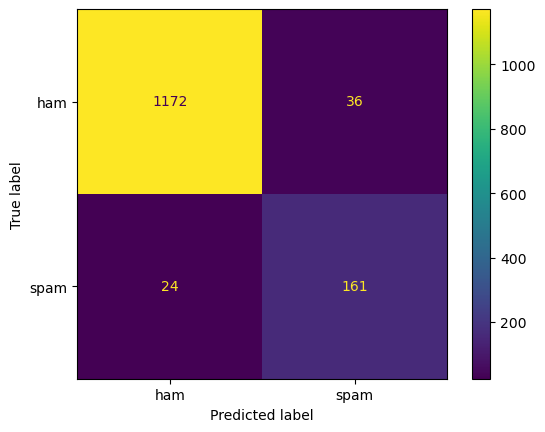

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      1208
        spam       0.82      0.87      0.84       185

    accuracy                           0.96      1393
   macro avg       0.90      0.92      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [56]:
accuracy_score(y_test, y_pred)

0.9569274946159368

### Sample dataset

In [57]:
df = pd.read_csv("Sample.csv", sep ='\t', names =['text'])

In [58]:
df.head()

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [59]:
df.shape

(3, 1)

In [60]:
df.columns

Index(['text'], dtype='object')

In [61]:
df.describe

<bound method NDFrame.describe of                                                 text
0  Ok lar i double check wif da hair dresser alre...
1  As a valued customer, I am pleased to advise y...
2  Today is "song dedicated day.." Which song wil...>

In [62]:
df.info

<bound method DataFrame.info of                                                 text
0  Ok lar i double check wif da hair dresser alre...
1  As a valued customer, I am pleased to advise y...
2  Today is "song dedicated day.." Which song wil...>

In [63]:
df.isnull().sum()

text    0
dtype: int64

In [64]:
df.columns

Index(['text'], dtype='object')

In [65]:
new = tfidf.transform(df['text'])

In [66]:
dt.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)